In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("GoogleStockPrices.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
2511,2024-12-24 13:05:00,194.84,196.11,193.78,196.11,10403259
2512,2024-12-26 16:00:00,195.15,196.75,194.38,195.60,12057210
2513,2024-12-27 16:00:00,194.95,195.32,190.65,192.76,18891362
2514,2024-12-30 16:00:00,189.80,192.55,189.12,191.24,14264659
2515,2024-12-31 16:00:00,191.08,191.96,188.51,189.30,17466919


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Open    2516 non-null   float64
 2   High    2516 non-null   float64
 3   Low     2516 non-null   float64
 4   Close   2516 non-null   float64
 5   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [6]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,82.678052,83.560413,81.831208,82.714996,8.797572e+06
std,43.716508,44.214494,43.257158,43.735891,1.365305e+07
min,24.960000,25.010000,24.550000,24.850000,4.656380e+05
25%,47.367500,47.637500,47.000000,47.380000,1.398751e+06
50%,64.530000,65.045000,63.935000,64.710000,1.876044e+06
75%,119.665000,121.042500,118.592500,119.700000,6.056782e+06
max,197.250000,201.420000,194.980000,196.660000,1.194550e+08


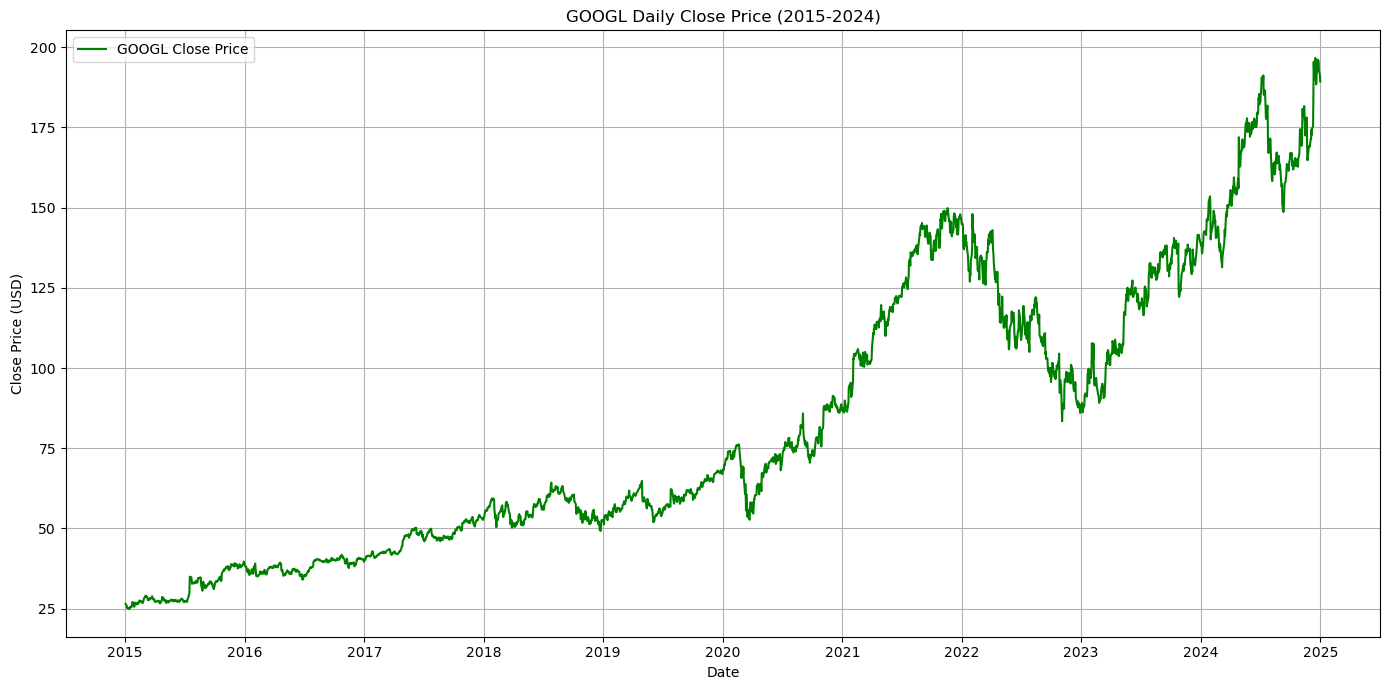

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='GOOGL Close Price', color='green')
plt.title('GOOGL Daily Close Price (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

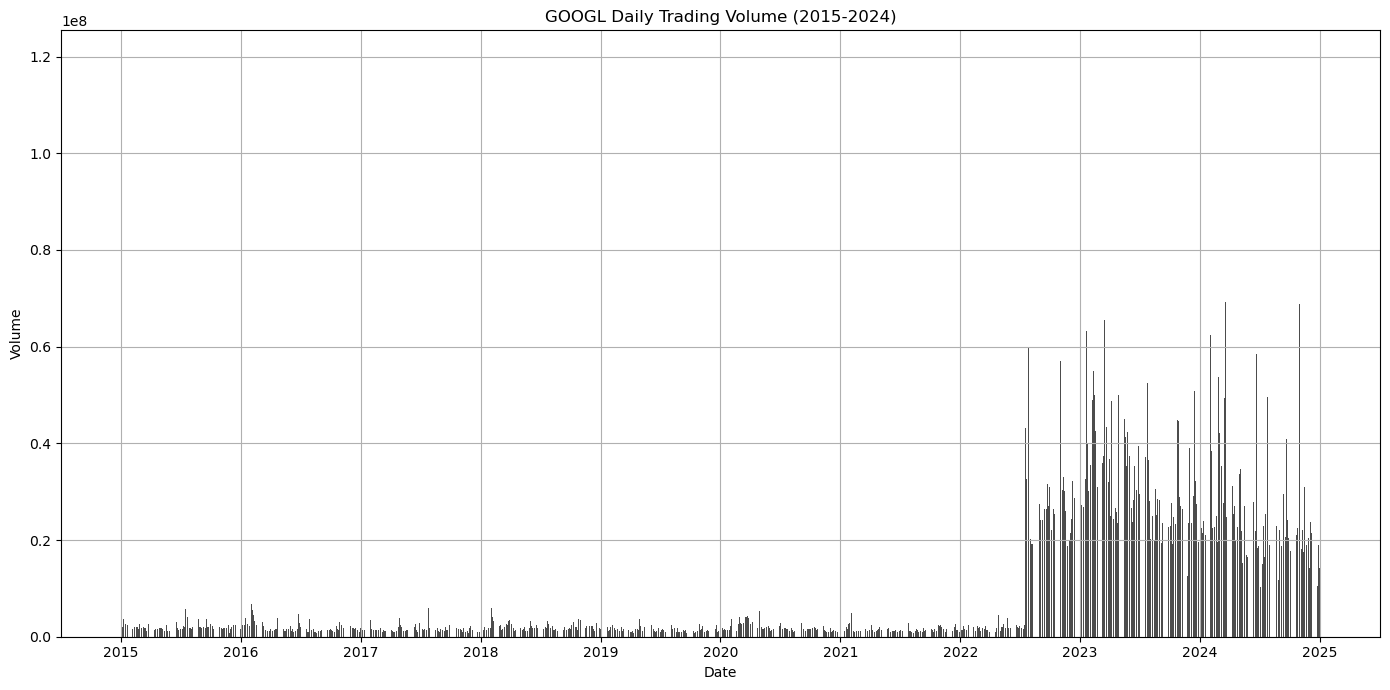

In [10]:
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], color='black', alpha=0.7)
plt.title('GOOGL Daily Trading Volume (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

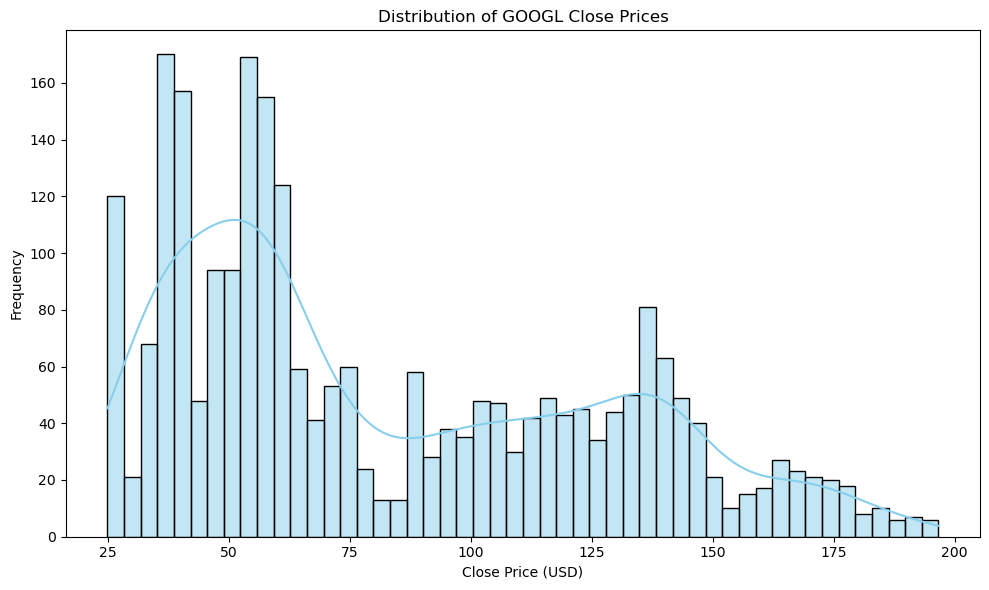

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of GOOGL Close Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

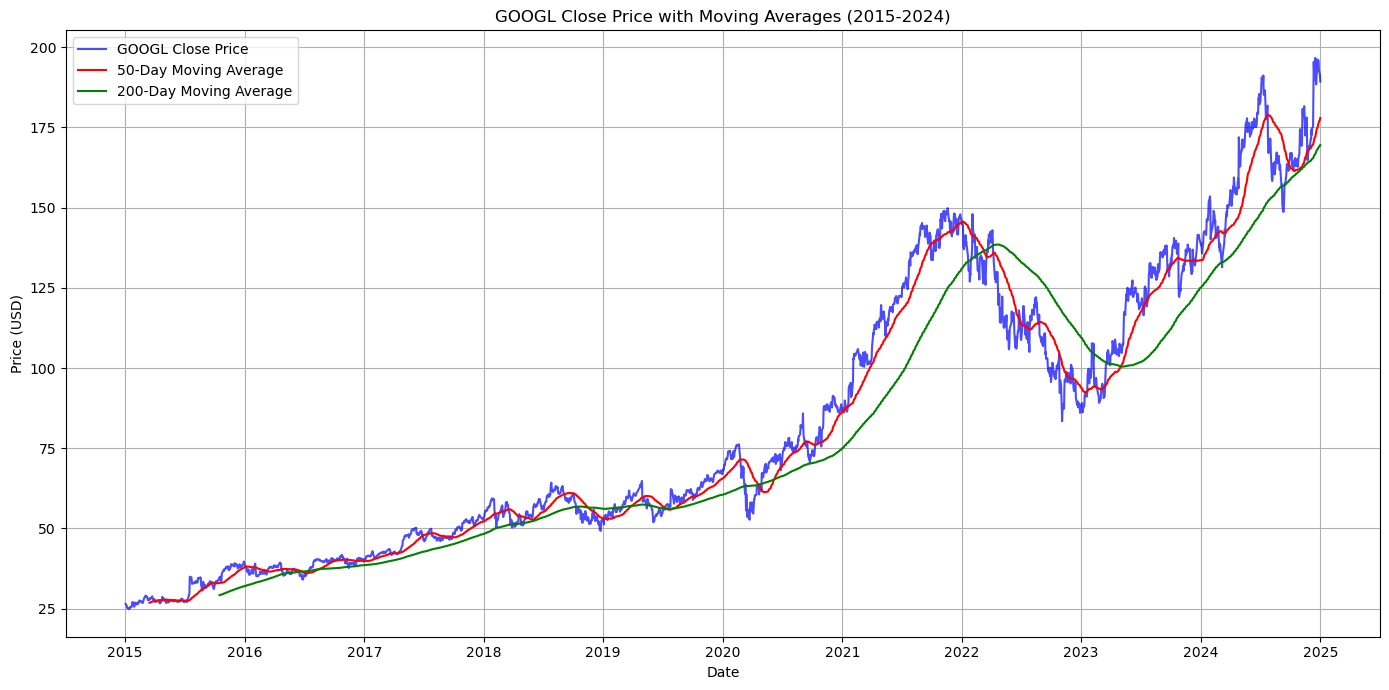

In [12]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='GOOGL Close Price', color='blue', alpha=0.7)
plt.plot(df.index, df['MA_50'], label='50-Day Moving Average', color='red')
plt.plot(df.index, df['MA_200'], label='200-Day Moving Average', color='green')
plt.title('GOOGL Close Price with Moving Averages (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

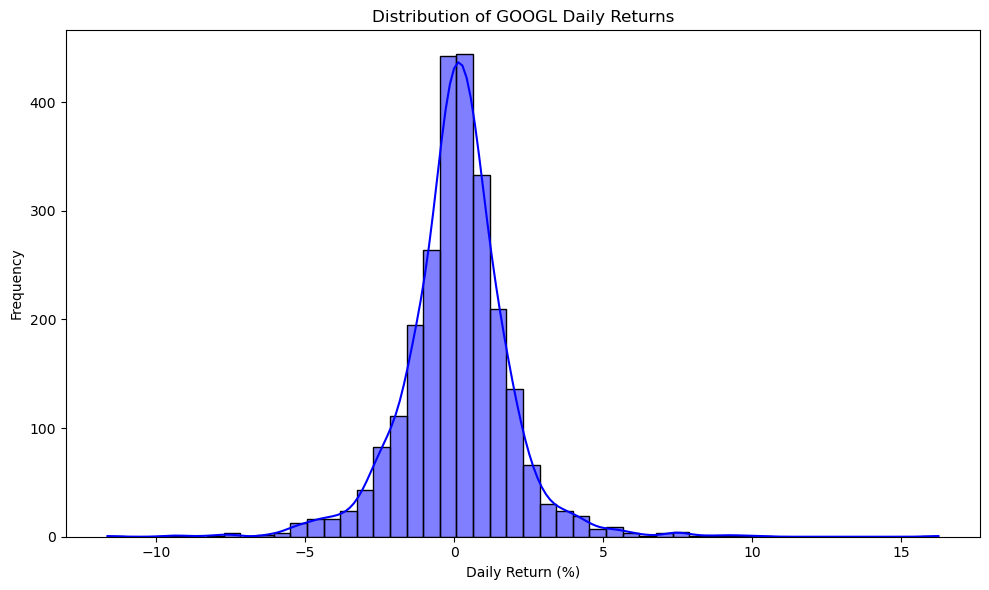

In [13]:
df['Daily_Return'] = df['Close'].pct_change() * 100
df_returns = df.dropna(subset=['Daily_Return'])

plt.figure(figsize=(10, 6))
sns.histplot(df_returns['Daily_Return'], kde=True, bins=50, color='blue')
plt.title('Distribution of GOOGL Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

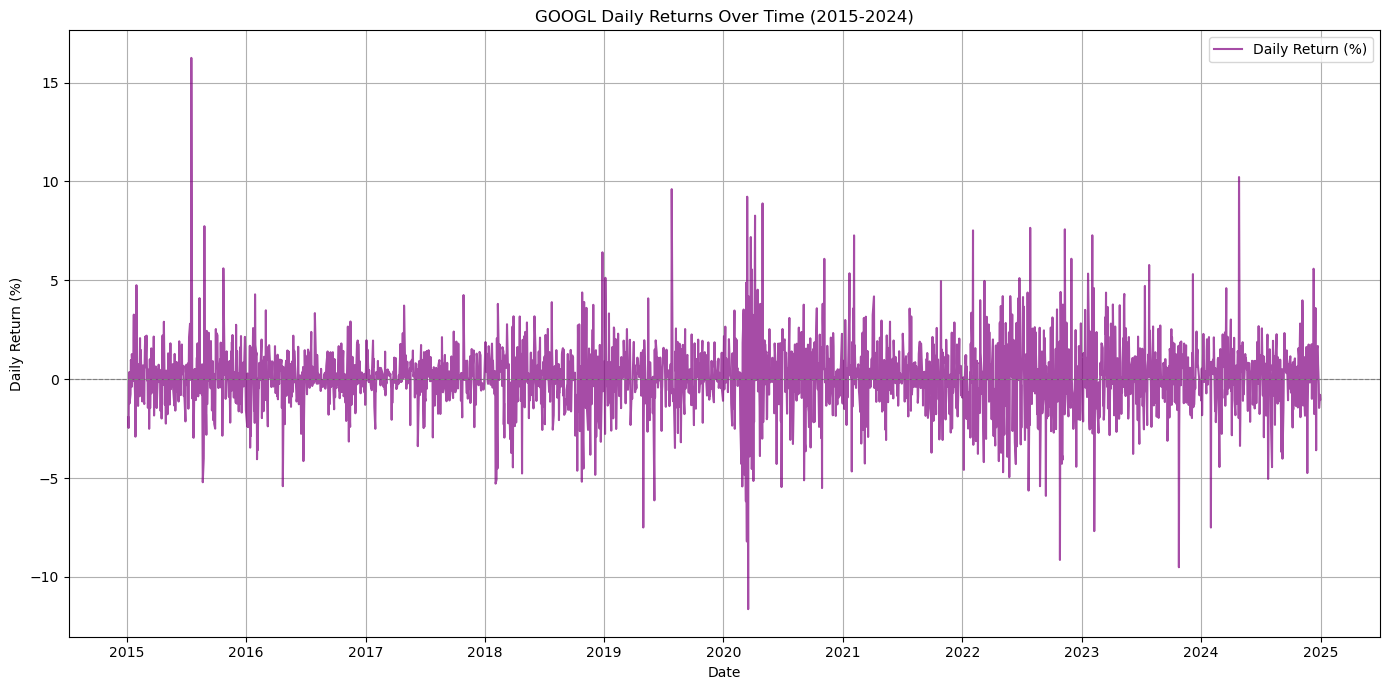

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df_returns.index, df_returns['Daily_Return'], label='Daily Return (%)', color='purple', alpha=0.7)
plt.title('GOOGL Daily Returns Over Time (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Analysis